# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('ALUGUEL_MOD12.csv', delimiter=';')
df.head()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0


In [3]:
X = df[['Metragem']]
y = df['Valor_Aluguel']

# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [4]:
# utilizando polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[1.0000e+00, 4.8000e+01, 2.3040e+03],
       [1.0000e+00, 5.0000e+01, 2.5000e+03],
       [1.0000e+00, 4.0000e+01, 1.6000e+03],
       ...,
       [1.0000e+00, 2.6600e+02, 7.0756e+04],
       [1.0000e+00, 6.0000e+02, 3.6000e+05],
       [1.0000e+00, 2.4800e+02, 6.1504e+04]], shape=(7203, 3))

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [5]:
# separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# criando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

Mean Squared Error: 4645995.564625917
R^2 Score: 0.5710538044099789




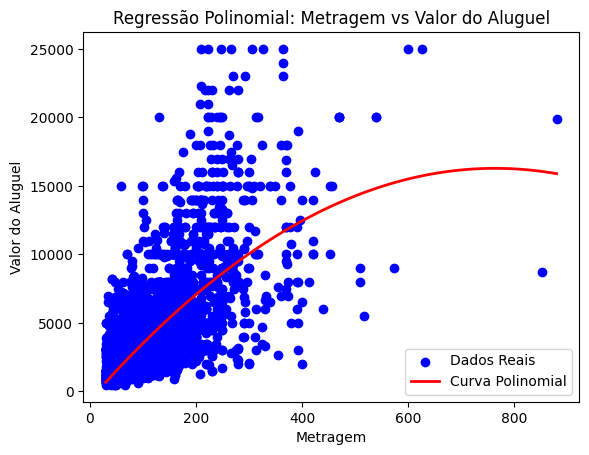

In [ ]:
# avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}\n\n')

# visualização dos resultados
# gerar uma linha suave para a curva polinomial
x_range = pd.DataFrame(
    np.linspace(X.min(), X.max(), 100).reshape(-1, 1),
    columns=X.columns
)

x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

# plotar os dados reais e a curva polinomial ajustada
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(x_range, y_range_pred, color='red', linewidth=2, label='Curva Polinomial')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial: Metragem vs Valor do Aluguel')
plt.legend()
plt.show()

#### Avaliando os resultados do modelo treinado com degree = 2

O modelo não apresentou um resultado ideal, o R2, MSE e o gráico de distribuição com a curva indicam que o modelo não explica bem a variância dos dados, estando próximo de "chutar" um resultado.

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [8]:
# retreinar o modelo com grau 4
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_poly4, y, test_size=0.2, random_state=42)

model_degree4 = LinearRegression()
model_degree4.fit(X_train4, y_train4)
y_pred4 = model_degree4.predict(X_test4)

Mean Squared Error: 4782486.090646063
R^2 Score: 0.558452179837585




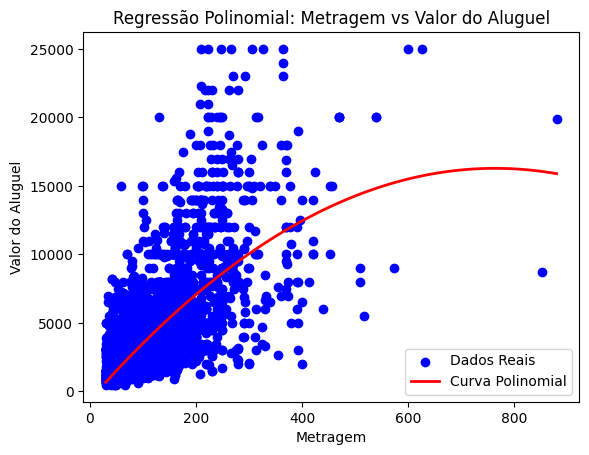

In [ ]:
# avaliação do modelo
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}\n\n')

# visualização dos resultados
# gerar uma linha suave para a curva polinomial
x_range = pd.DataFrame(
    np.linspace(X.min(), X.max(), 100).reshape(-1, 1),
    columns=X.columns  # mantém o mesmo nome da coluna original
)

x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

# plotar os dados reais e a curva polinomial ajustada
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(x_range, y_range_pred, color='red', linewidth=2, label='Curva Polinomial')
plt.xlabel('Metragem')
plt.ylabel('Valor do Aluguel')
plt.title('Regressão Polinomial: Metragem vs Valor do Aluguel')
plt.legend()
plt.show()

##### Avaliando os resultados do modelo treinado com o degree = 4

Mesmo aumentando a potência das variáveis de entrada o modelo ainda não obteve um resultado satisfatório para poder utilizá-lo em produção. O resultado utilizando o degree = 4 é pior do que com o degree = 2, indiciando que para melhorar o modelo não é o degree que deve ser modificado, e sim outras medidas devem ser tomadas, como: Utilização de técnicas de regularização, padronização e tratamento dos dados, e uma escolha melhor de features

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

 * Ridge: Utiliza penalidades para reduzir o risco de overfitting e melhorar a generalização do modelo de regressão. A penalidade se baseia na soma dos quadrados dos coeficientes dos atributos. Especialmente útil para evitar multicolinearidade.

 * Lasso: Seleciona as váriaveis reduzindo alguns coeficientes a zero por uma penalização baseada na soma dos valores absolutos dos coeficientes dos atributos. Útil para reduzir overfitting e selecionar as variáveis mais relevantes para o modelo.

* Elastic Net: Combina Lasso e Ridge criando dois termos: L1 para Lasso e L2 para Ridge. Extremamente útil para dados com múltiplas variáveis correlacionadas, é flexível e oferece um euqilíbrio entre L1 e L2, podendo ser melhor do que utilizar Lasso e Ridge em casos específicos.